In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
td=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [27]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
td.shape

(891, 12)

In [29]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# suvived data

<AxesSubplot:xlabel='Survived', ylabel='count'>

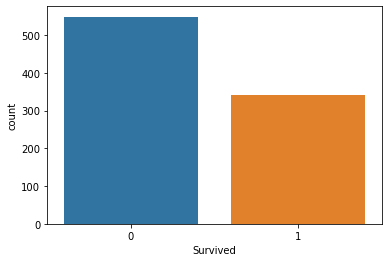

In [32]:
sns.countplot(x='Survived',data=td)

<AxesSubplot:xlabel='Survived', ylabel='count'>

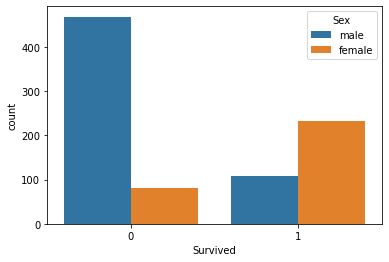

In [33]:
sns.countplot(x='Survived',hue='Sex',data=td)

<AxesSubplot:xlabel='Age', ylabel='count'>

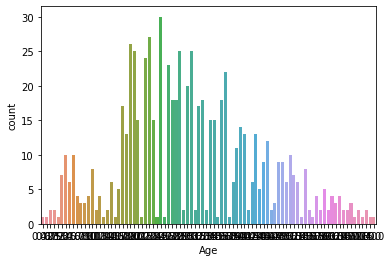

In [34]:
sns.countplot(x="Age",data=td)

<AxesSubplot:xlabel='Age', ylabel='count'>

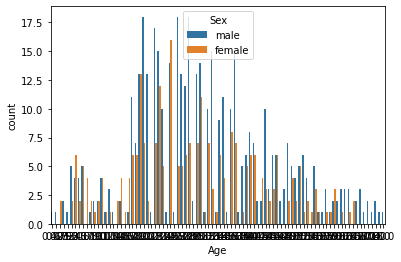

In [35]:
sns.countplot(x='Age',hue="Sex",data=td)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

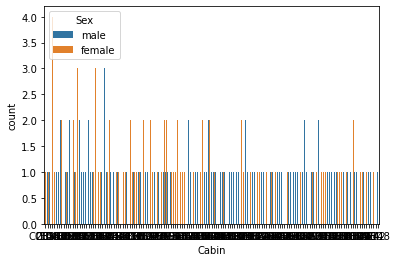

In [36]:
sns.countplot(x='Cabin',hue="Sex",data=td)

# data Wrangling

In [37]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

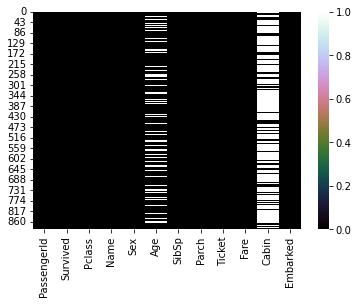

In [38]:
sns.heatmap(td.isnull(),cmap='cubehelix')

<AxesSubplot:>

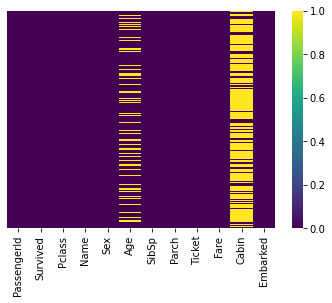

In [39]:
sns.heatmap(td.isnull(),yticklabels=False,cmap='viridis')

# dots in Pclass 2,3 represents outliers in data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

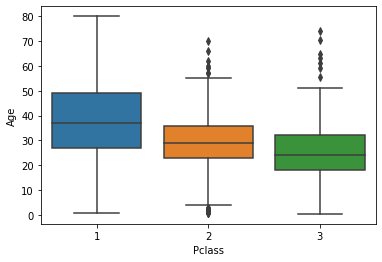

In [40]:
sns.boxplot(x='Pclass',y='Age',data=td)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

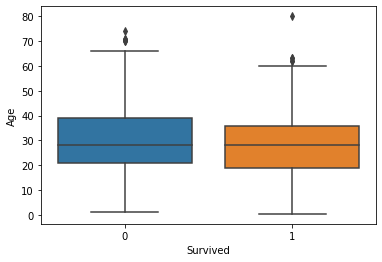

In [41]:
sns.boxplot(x='Survived',y="Age",data=td)

In [42]:
td.drop("Cabin",axis=1,inplace=True)

# replacing null values with median

In [43]:
median=td["Age"].median()

td["Age"].replace(np.nan,median,inplace=True)

# Replace with mode
mode=td["Embarked"].mode().values[0]

In [44]:
mode=td["Embarked"].mode().values[0]

td["Embarked"]=td['Embarked'].replace(np.nan,mode)

In [45]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

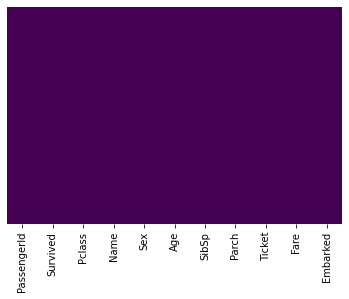

In [46]:
sns.heatmap(td.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [47]:
td.dropna(inplace=True)

<AxesSubplot:>

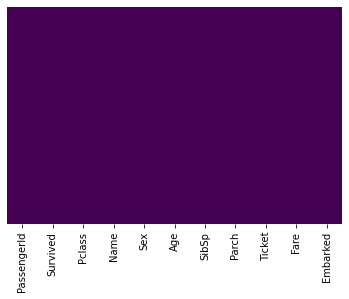

In [48]:
sns.heatmap(td.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# change categorical data to numerical  One Hot Encoding

In [49]:
dummies=pd.get_dummies(td[['Embarked',"Sex","Pclass"]],columns=['Embarked',"Sex","Pclass"],drop_first=True)

In [50]:
dummies.head(7)

,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,1,0,0,0
4,0,1,1,0,1
5,1,0,1,0,1
6,0,1,1,0,0


In [52]:
columns=["Embarked","Sex","Pclass"]
td=pd.concat([td,dummies],axis=1)
# drop original column 
td.drop(columns,axis=1,inplace=True)

KeyError: "['Embarked' 'Sex' 'Pclass'] not found in axis"

# drop unwanted column for train an test